<a href="https://colab.research.google.com/github/ggyuchive/MLpractice/blob/main/Introduction%20to%20Machine%20Learning/Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import Numpy, Pandas, Matplotlib, Sklearn
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import sklearn

In [2]:
x = np.array([[1,2,3], [4,5,6]])
x

array([[1, 2, 3],
       [4, 5, 6]])

In [3]:
eye = np.eye(4)
eye

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [4]:
from scipy import sparse
sparse_matrix = sparse.csr_matrix(eye)
print(sparse_matrix)

  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


###Note 1.
**np.ones(x)** : 길이가 x이면서 값이 1인 배열  
**np.arange(x)** : 길이가 x이면서 값이 0~(x-1)인 배열 

In [5]:
data = np.ones(4)
print(data)
row_indices = np.arange(4)
print(row_indices)
col_indices = np.arange(4)
print(col_indices)
eye_coo = sparse.coo_matrix((data, (row_indices, col_indices)))
print(eye_coo)

[1. 1. 1. 1.]
[0 1 2 3]
[0 1 2 3]
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


### Note 2.
**np.linspace(x, y, d)** : 초항 a, 막항 b, 길이 d인 등차수열 배열  
**plt.plot(x, y)** : (x, y) 값을 이은 그래프 표시

[-10.          -7.77777778  -5.55555556  -3.33333333  -1.11111111
   1.11111111   3.33333333   5.55555556   7.77777778  10.        ]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


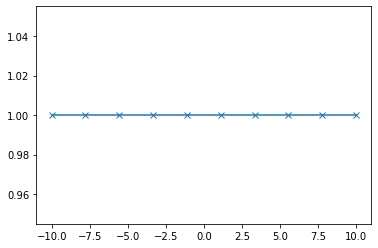

In [6]:
x = np.linspace(-10,10,10)
print(x)
y = np.sin(x)*np.sin(x)+np.cos(x)*np.cos(x)
print(y)
plt.plot(x,y,marker="x")

### Note 3.
**pd.DataFrame(X)** : 배열 X를 DataFrame 형식으로 변경  
DataFrame으로 쿼리, 조인 등 SQL 기능 수행이 가능

In [7]:
data = {'Name': ["John", "Anna", "Peter", "Linda"],
        'Location': ["New York", "Paris", "Berlin", "London"],
        'Age': [24, 13, 53, 33]
        }
data_pandas = pd.DataFrame(data)
display(data_pandas)

,Name,Location,Age
0,John,New York,24
1,Anna,Paris,13
2,Peter,Berlin,53
3,Linda,London,33


In [8]:
display(data_pandas[data_pandas.Age > 30])

str_expr = "Age > 20 and Age > 30"
# display(data_pandas.query(Age > 20))  Error!
display(data_pandas.query(str_expr))

# str_expr2 = "Age > 20 and Name == "John""  Error!
word = "John"
str_expr2 = "Age > 20 and Name == @word"
display(data_pandas.query(str_expr2))

,Name,Location,Age
2,Peter,Berlin,53
3,Linda,London,33


,Name,Location,Age
2,Peter,Berlin,53
3,Linda,London,33


,Name,Location,Age
0,John,New York,24


### Note 4.
iris 데이터를 sklearn에서 받아오기  
iris는 Dictionary Object  
target name 3개 (0,1,2)  
feature name 4개  
data 150개  

In [9]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.keys())
print(iris['target_names'])
print(iris['feature_names'])

iris_data = pd.DataFrame(iris['data'])
iris_target = pd.DataFrame(iris['target'])
display(iris_data[:5], iris_target[:5])

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


,0
0,0
1,0
2,0
3,0
4,0


### Note 5.
훈련 데이터(train set) (75%)  
테스트 데이터(test set) (25%) 로 나누기  
**train_test_split**은 데이터를 무작위로 섞어줌  
parameter : data set, target set, **random_state=0 (항상 같은 결과로 섞음)**  
return    : X_train, X_test, y_train, y_test 

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (
    iris_data, iris_target, random_state=0
)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(112, 4) (38, 4) (112, 1) (38, 1)
